In [112]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *
from pandas import read_html

In [113]:
URL = 'https://en.wikipedia.org/wiki/World_population_estimates'
tables = pd.read_html(URL)
len(tables)

6

In [114]:
table2 = tables[2]
table2.head()

,Year,United States Census Bureau (2017)[29],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[25],Tanton (1994)[19],Biraben (1980)[20],McEvedy & Jones (1978)[21],Thomlinson (1975)[22],Durand (1974)[23],Clark (1967)[24]
0,1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1,1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
filename = URL
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [116]:
un = table2.un / 1e9
un.head()

Year
1950    2.525149
1951    2.572851
1952    2.619292
1953    2.665865
1954    2.713172
Name: un, dtype: float64

In [117]:
census = table2.census / 1e9
census.head()

Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
Name: census, dtype: float64

In [132]:
t_0 = census.index[0]
t_end = census.index[-1]
elapsed_time = t_end - t_0
p_0 = census.index[0]
p_end = census.index[-1]
total_growth = p_end - p_0
annual_growth = total_growth / elapsed_time

##System objects:

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                annual_growth=annual_growth)

namespace(t_0=1950, t_end=2016, p_0=1950, annual_growth=1.0)

In [133]:
def run_simulation1(system):
    """Runs the constant growth model.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = results[t] + system.annual_growth
    
    return results

In [120]:
def run_simulation1(system):
    """Runs the constant growth model.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = results[t] + system.annual_growth
    
    return results

In [134]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [128]:
def run_simulation2(system):
    """Run a model with proportional birth and death.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths
        
    return results

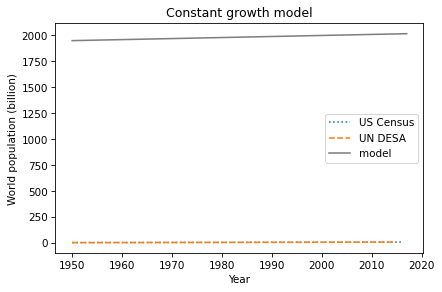

In [135]:
results = run_simulation1(system)
plot_results(census, un, results, 'Constant growth model')

In [136]:
## Proportional growth:
def run_simulation2(system):
    """Run a model with proportional birth and death.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths
        
    return results

In [137]:
system.death_rate = 0.01
system.birth_rate = 0.027

FileNotFoundError: [Errno 2] No such file or directory: 'figs/chap06-fig01.pdf'

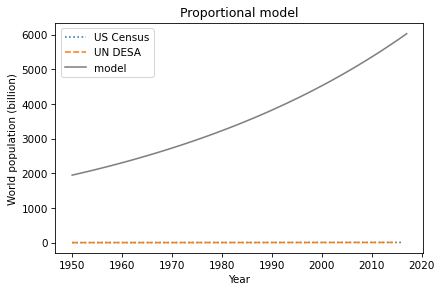

In [138]:
results = run_simulation2(system)
plot_results(census, un, results, 'Proportional model')
savefig('figs/chap06-fig01.pdf')


In [139]:
## Factoring out the update function:
def update_func1(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    return pop + births - deaths


In [140]:
update_func1

<function __main__.update_func1(pop, t, system)>

In [141]:
type(update_func1)

function

In [142]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [143]:
t_0 = census.index[0]
t_end = census.index[-1]
p_0 = census[t_0]
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                birth_rate=0.027,
                death_rate=0.01)

namespace(t_0=1950,
          t_end=2016,
          p_0=2.557628654,
          birth_rate=0.027,
          death_rate=0.01)

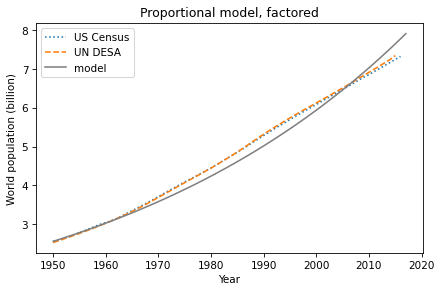

In [144]:
results = run_simulation(system, update_func1)
plot_results(census, un, results, 'Proportional model, factored')

In [145]:
##Combining birth and death:
def update_func2(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha  * pop
    return pop + net_growth

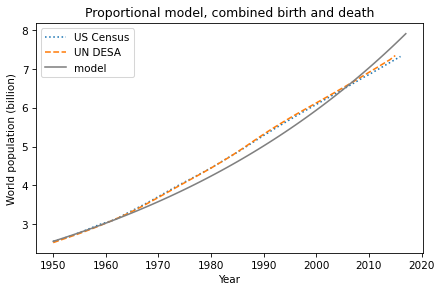

In [146]:
system.alpha = system.birth_rate - system.death_rate

results = run_simulation(system, update_func2)
plot_results(census, un, results, 'Proportional model, combined birth and death')

In [147]:
##Exercises:

def update_func3(pop, t, system): #Function calculates population for next year
    if t < 1980:
        net_growth = system.alpha1 * pop
    else:
        net_growth = system.alpha2 * pop
    return pop + net_growth

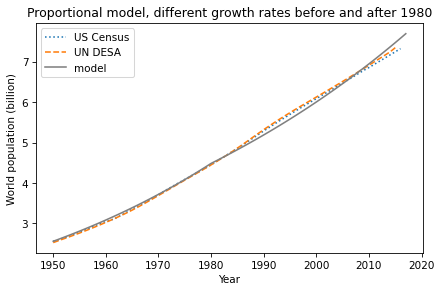

In [148]:
system.alpha1 = 0.0189 #Growth rate upto 1980
system.alpha2 = 0.0147 #Growth rate after 1980

results = run_simulation(system, update_func3)
plot_results(census, un, results, 'Proportional model, different growth rates before and after 1980')